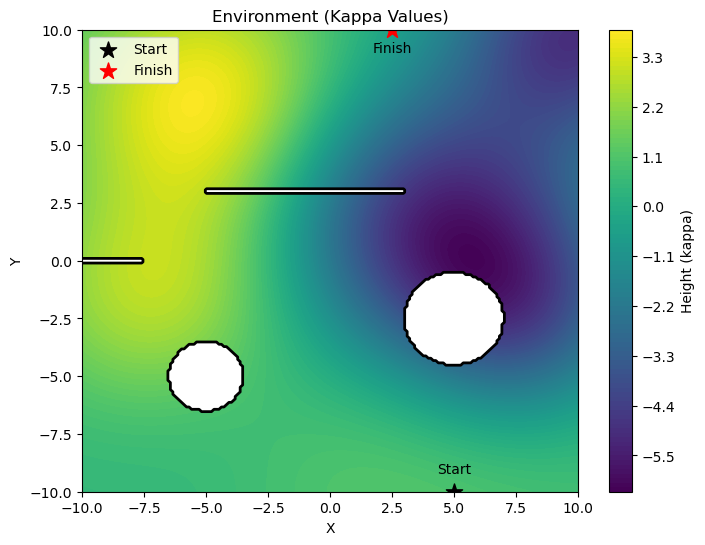

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the finer grid of x and y values
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)

# Base height level
kappa = np.full_like(X, 0.4)  # Base height set to 0.4

# Define the locations, depths/heights, and widths of pits and hills
# Define the locations, depths/heights, and widths of pits and hills
pits_and_hills = [
    {"center": (-5, 7), "value": 4.5, "width": 3.8},  # This means height relative to base is 1 - 1 = 0
    {"center": (7.5, -2.5), "value": 2.5, "width": 4.9}, # This means height relative to base is 1.9 - 1 = 0.9
    {"center": (-5, -5), "value": 0.2, "width": 3.8}, # Relative height is 2.5 - 1 = 1.5
    {"center": (0.5, -1), "value": 1.7, "width": 4.5},  # Relative height is 0.7 - 1 = -0.3
    {"center": (10, 10), "value": -4, "width": 3.5},  # Relative height is 1.1 - 1 = 0.1
    {"center": (-7, -1.6), "value": 3.5, "width": 3.5},  # Relative height is 1.1 - 1 = 0.1
    {"center": (2.5, -5.0), "value": 2.1, "width": 6.5},  # Relative height is 1.1 - 1 = 0.1
    {"center": (4, 1.0), "value": -6, "width": 4.5},  # Relative height is 1.1 - 1 = 0.1
    {"center": (8, -2.5), "value": -3.1, "width": 3.5},  # Relative height is 1.1 - 1 = 0.1
]

# Calculate kappa values with smooth transitions and custom widths
for feature in pits_and_hills:
    center_x, center_y = feature["center"]
    height_value = feature["value"]
    width = feature["width"]
    relative_height = height_value - 1  # Adjust heights relative to the base
    kappa += relative_height * np.exp(-((X - center_x) ** 2 + (Y - center_y) ** 2) / (2 * width ** 2))

# Define obstacles
obstacles = [
    {"type": "circle", "center": (5, -2.5), "radius": 2},
    {"type": "circle", "center": (-5, -5), "radius": 1.5},
    {"type": "wall", "x_range": (-10, -7.5), "y_pos": 0},
    {"type": "wall", "x_range": (-5, 3), "y_pos": 3},

]


# Create a mask for obstacles
obstacle_mask = np.zeros_like(kappa, dtype=bool)

for obstacle in obstacles:
    if obstacle["type"] == "circle":
        center_x, center_y = obstacle["center"]
        radius = obstacle["radius"]
        obstacle_mask |= (X - center_x) ** 2 + (Y - center_y) ** 2 <= radius ** 2
    elif obstacle["type"] == "wall":
        x_start, x_end = obstacle["x_range"]
        y_pos = obstacle["y_pos"]
        obstacle_mask |= (X >= x_start) & (X <= x_end) & (np.abs(Y - y_pos) < 0.1)

# Apply obstacle mask to kappa
kappa_with_obstacles = kappa.copy()
kappa_with_obstacles[obstacle_mask] = np.nan  # Obstacles will be plotted as black

# Start and finish positions
start_position = (5, -10)
finish_position = (2.5, 10)

# Plotting the result
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, kappa_with_obstacles, 100, cmap='viridis')  # Use a colormap for kappa
plt.colorbar(label='Height (kappa)')

# Overlay obstacles in black
plt.contour(X, Y, obstacle_mask, levels=[0.5], colors='black', linewidths=2)

# Plot start and finish points with red stars
plt.scatter(*start_position, color='black', s=150, marker='*', label='Start')  # Start marker
plt.scatter(*finish_position, color='red', s=150, marker='*', label='Finish')  # Finish marker

# Add text annotations
plt.text(start_position[0], start_position[1] + 0.8, "Start", color='black', fontsize=10, ha='center')
plt.text(finish_position[0], finish_position[1] - 1, "Finish", color='black', fontsize=10, ha='center')

# Add legend
plt.legend(loc='upper left')

plt.title("Environment (Kappa Values)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

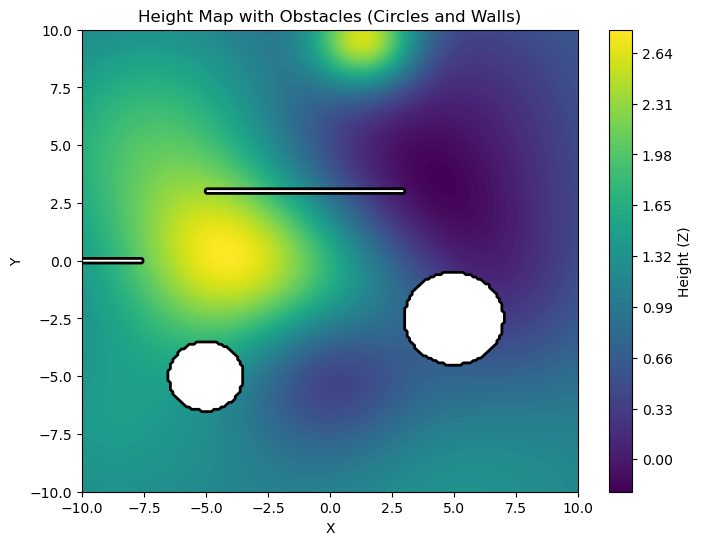

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the finer grid of x and y values
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)

# Base height level
Z = np.full_like(X, 0.9)  # Base height changed to 0.9

# Define the locations, depths/heights, and widths of pits and hills
pits_and_hills = [
    {"center": (-9, -7), "value": 1.5, "width": 3.8},  
    {"center": (3, -2), "value": 1.5, "width": 2.3},
    {"center": (5, 6), "value": 0.3, "width": 4.8},
    {"center": (1.5, 2), "value": 0.3, "width": 3.5},  
    {"center": (-7, 5), "value": 2.0, "width": 3.8},
    {"center": (5, -8), "value": 1.5, "width": 5.5},
    {"center": (0, 0), "value": 1.9, "width": 2.5},
    {"center": (-4, -0), "value": 2.5, "width": 2.8},
    {"center": (1.4, 9.6), "value": 3.1, "width": 1.5},
    {"center": (6, -2), "value": 0.22, "width": 3.5},
    {"center": (0, -5), "value": 0.12, "width": 2.5}, 
]

# Calculate z values with smooth transitions and custom widths
for feature in pits_and_hills:
    center_x, center_y = feature["center"]
    height_value = feature["value"]
    width = feature["width"]
    relative_height = height_value - 1
    Z += relative_height * np.exp(-((X - center_x) ** 2 + (Y - center_y) ** 2) / (2 * width ** 2))

# Define obstacles
obstacles = [
    {"type": "circle", "center": (5, -2.5), "radius": 2},
    {"type": "circle", "center": (-5, -5), "radius": 1.5},
    {"type": "wall", "x_range": (-10, -7.5), "y_pos": 0},
    {"type": "wall", "x_range": (-5, 3), "y_pos": 3},

]

# Create a mask for obstacles
obstacle_mask = np.zeros_like(Z, dtype=bool)

for obstacle in obstacles:
    if obstacle["type"] == "circle":
        center_x, center_y = obstacle["center"]
        radius = obstacle["radius"]
        obstacle_mask |= (X - center_x) ** 2 + (Y - center_y) ** 2 <= radius ** 2
    elif obstacle["type"] == "wall":
        x_start, x_end = obstacle["x_range"]
        y_pos = obstacle["y_pos"]
        obstacle_mask |= (X >= x_start) & (X <= x_end) & (np.abs(Y - y_pos) < 0.1)

# Apply obstacle mask to Z
Z_with_obstacles = Z.copy()
Z_with_obstacles[obstacle_mask] = np.nan  # Obstacles will be plotted as black

# Plotting the result
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z_with_obstacles, 100, cmap='viridis')  # Use a colormap for Z
plt.colorbar(label='Height (Z)')

# Overlay obstacles in black
plt.contour(X, Y, obstacle_mask, levels=[0.5], colors='black', linewidths=2)

plt.title("Height Map with Obstacles (Circles and Walls)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [30]:
z_flat = Z.flatten()
print(np.min(z_flat), np.max(z_flat))

-0.19493617011625064 2.809750108958201


In [31]:
import pandas as pd

# Flatten the grid data for storing in the DataFrame
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
kappa_flat = kappa.flatten()
obstacle_flat = obstacle_mask.flatten()

# Create a pandas DataFrame with columns 'x', 'y', and 'z'
df = pd.DataFrame({'x': x_flat, 'y': y_flat, 'z': z_flat, 'kappa': kappa_flat, 'is_obstacle': obstacle_flat})

# Save the DataFrame to a CSV file
df.to_csv('environment.csv', index=False)

In [32]:
# choose 5 random samples from the DataFrame
#samples = df.sample(5)
# save the samples to a CSV file
#samples.to_csv('environment_samples.csv', index=False)